In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [32]:
daily_activity = pd.read_csv("dailyActivity_merged.csv")
daily_calories = pd.read_csv( "dailyCalories_merged.csv")
daily_intensity = pd.read_csv("dailyIntensities_merged.csv")
daily_steps = pd.read_csv("dailySteps_merged.csv")
heartrate = pd.read_csv("heartrate_seconds_merged.csv")
sleep_day = pd.read_csv("sleepDay_merged.csv")
weight_log = pd.read_csv("weightLogInfo_merged.csv")

In [2]:
#Load the Fitbit dataset using pandas
daily_activity= pd.read_csv("dailyActivity_merged.csv")

daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
# 1. First use the daily activity data and find the unique id of all the users.
unique_users = daily_activity['Id'].nunique()
unique_users

33

In [4]:
# 2.Then find the number of days they use their fitness tracker.

days_used = daily_activity.groupby('Id')['ActivityDate'].nunique().reset_index()
days_used.columns = ['Id','Usage_Days']
days_used.head()

,Id,Usage_Days
0,1503960366,31
1,1624580081,31
2,1644430081,30
3,1844505072,31
4,1927972279,31


In [5]:
# 3. Use this data to group all the users into Active(>20), moderate(>10,<20) and
# light(<10) users.
# (for example active user can be the one wearing the gear for more than 20 days)

def user_category(days):
    if days > 20:
        return 'Active'
    elif days >= 10:
        return 'Moderate'
    else:
        return 'Light'

days_used['User_Type'] = days_used['Usage_Days'].apply(user_category)
days_used.head()

,Id,Usage_Days,User_Type
0,1503960366,31,Active
1,1624580081,31,Active
2,1644430081,30,Active
3,1844505072,31,Active
4,1927972279,31,Active


In [6]:
# 4. After that find out the mean distance traveled by each user.

mean_distance = daily_activity.groupby('Id')['TotalDistance'].mean().reset_index()
mean_distance.head()

,Id,TotalDistance
0,1503960366,7.809677
1,1624580081,3.914839
2,1644430081,5.295333
3,1844505072,1.706129
4,1927972279,0.634516


In [7]:
# 5. Use this mean distance to group each user into Pro,Intermediate and
# beginner.(set criteria by yourself)

def fitness_level(dist):
    if dist > 8:
        return 'Pro'
    elif dist > 4:
        return 'Intermediate'
    else:
        return 'Beginner'

mean_distance['Fitness_Level'] = mean_distance['TotalDistance'].apply(fitness_level)
mean_distance.head()

,Id,TotalDistance,Fitness_Level
0,1503960366,7.809677,Intermediate
1,1624580081,3.914839,Beginner
2,1644430081,5.295333,Intermediate
3,1844505072,1.706129,Beginner
4,1927972279,0.634516,Beginner


In [8]:
# 6. Then find out the total steps traveled by each user

total_steps = daily_activity.groupby('Id')['TotalSteps'].sum().reset_index()
total_steps.head()

,Id,TotalSteps
0,1503960366,375619
1,1624580081,178061
2,1644430081,218489
3,1844505072,79982
4,1927972279,28400


In [9]:
# 7. Then find out the calories burned by each user

total_calories = daily_activity.groupby('Id')['Calories'].sum().reset_index()
total_calories.head()

,Id,Calories
0,1503960366,56309
1,1624580081,45984
2,1644430081,84339
3,1844505072,48778
4,1927972279,67357


In [10]:
# 8. And then find out their fairly active, lightly active and Very active minutes.

active_minutes = daily_activity.groupby('Id')[[
    'FairlyActiveMinutes',
    'LightlyActiveMinutes',
    'VeryActiveMinutes'
]].sum().reset_index()

active_minutes.head()

,Id,FairlyActiveMinutes,LightlyActiveMinutes,VeryActiveMinutes
0,1503960366,594,6818,1200
1,1624580081,180,4758,269
2,1644430081,641,5354,287
3,1844505072,40,3579,4
4,1927972279,24,1196,41


In [11]:
# 9. Repeat all these tasks (1 to 8) with respect to distinct dates (for example find out
 #unique dates instead of unique id and calculate number of users on that date).

user_summary = (
    days_used
    .merge(mean_distance, on='Id')
    .merge(total_steps, on='Id')
    .merge(total_calories, on='Id')
    .merge(active_minutes, on='Id')
)

user_summary.head()

,Id,Usage_Days,User_Type,TotalDistance,Fitness_Level,TotalSteps,Calories,FairlyActiveMinutes,LightlyActiveMinutes,VeryActiveMinutes
0,1503960366,31,Active,7.809677,Intermediate,375619,56309,594,6818,1200
1,1624580081,31,Active,3.914839,Beginner,178061,45984,180,4758,269
2,1644430081,30,Active,5.295333,Intermediate,218489,84339,641,5354,287
3,1844505072,31,Active,1.706129,Beginner,79982,48778,40,3579,4
4,1927972279,31,Active,0.634516,Beginner,28400,67357,24,1196,41


In [13]:
# UNIQUE USERS PER DATE
date_users = daily_activity.groupby('ActivityDate')['Id'].nunique().reset_index()
date_users.columns = ['Date','Total_Users']
date_users.head()

,Date,Total_Users
0,4/12/2016,33
1,4/13/2016,33
2,4/14/2016,33
3,4/15/2016,33
4,4/16/2016,32


In [15]:
# DAILY MEAN DISTANCE
date_distance = daily_activity.groupby('ActivityDate')['TotalDistance'].mean().reset_index()
date_distance

,ActivityDate,TotalDistance
0,4/12/2016,5.982727
1,4/13/2016,5.103333
2,4/14/2016,5.599394
3,4/15/2016,5.287879
4,4/16/2016,6.291563
5,4/17/2016,4.540625
6,4/18/2016,5.657812
7,4/19/2016,5.871875
8,4/20/2016,5.950313
9,4/21/2016,6.030000


In [17]:
#DAILY TOTAL STEPS
date_steps = daily_activity.groupby('ActivityDate')['TotalSteps'].sum().reset_index()
date_steps

,ActivityDate,TotalSteps
0,4/12/2016,271816
1,4/13/2016,237558
2,4/14/2016,255538
3,4/15/2016,248617
4,4/16/2016,277733
5,4/17/2016,205096
6,4/18/2016,252703
7,4/19/2016,257557
8,4/20/2016,261215
9,4/21/2016,263795


In [19]:
# DAILY CALORIES
date_calories = daily_activity.groupby('ActivityDate')['Calories'].sum().reset_index()
date_calories 

,ActivityDate,Calories
0,4/12/2016,78893
1,4/13/2016,75459
2,4/14/2016,77761
3,4/15/2016,77721
4,4/16/2016,76574
5,4/17/2016,71391
6,4/18/2016,74668
7,4/19/2016,75491
8,4/20/2016,76647
9,4/21/2016,77500


In [21]:
# DAILY ACTIVE MINUTES
date_active = daily_activity.groupby('ActivityDate')[[
    'FairlyActiveMinutes',
    'LightlyActiveMinutes',
    'VeryActiveMinutes'
]].sum().reset_index()

date_active

,ActivityDate,FairlyActiveMinutes,LightlyActiveMinutes,VeryActiveMinutes
0,4/12/2016,259,6567,736
1,4/13/2016,349,5998,671
2,4/14/2016,409,6633,691
3,4/15/2016,326,7057,633
4,4/16/2016,484,6202,891
5,4/17/2016,379,5291,605
6,4/18/2016,516,6025,781
7,4/19/2016,441,6461,767
8,4/20/2016,600,6515,774
9,4/21/2016,478,5845,859


In [24]:
# Rename columns 

date_users.rename(columns={'ActivityDate':'Date'}, inplace=True)
date_distance.rename(columns={'ActivityDate':'Date'}, inplace=True)
date_steps.rename(columns={'ActivityDate':'Date'}, inplace=True)
date_calories.rename(columns={'ActivityDate':'Date'}, inplace=True)
date_active.rename(columns={'ActivityDate':'Date'}, inplace=True)

In [25]:
date_users
date_distance
date_steps
date_calories
date_active

,Date,FairlyActiveMinutes,LightlyActiveMinutes,VeryActiveMinutes
0,4/12/2016,259,6567,736
1,4/13/2016,349,5998,671
2,4/14/2016,409,6633,691
3,4/15/2016,326,7057,633
4,4/16/2016,484,6202,891
5,4/17/2016,379,5291,605
6,4/18/2016,516,6025,781
7,4/19/2016,441,6461,767
8,4/20/2016,600,6515,774
9,4/21/2016,478,5845,859


In [27]:
# FINAL DATE SUMMARY TABLE
date_summary = (
    date_users
    .merge(date_distance, on='Date')
    .merge(date_steps, on='Date')
    .merge(date_calories, on='Date')
    .merge(date_active, on='Date')
)
date_summary.head()

,Date,Total_Users,TotalDistance,TotalSteps,Calories,FairlyActiveMinutes,LightlyActiveMinutes,VeryActiveMinutes
0,4/12/2016,33,5.982727,271816,78893,259,6567,736
1,4/13/2016,33,5.103333,237558,75459,349,5998,671
2,4/14/2016,33,5.599394,255538,77761,409,6633,691
3,4/15/2016,33,5.287879,248617,77721,326,7057,633
4,4/16/2016,32,6.291563,277733,76574,484,6202,891


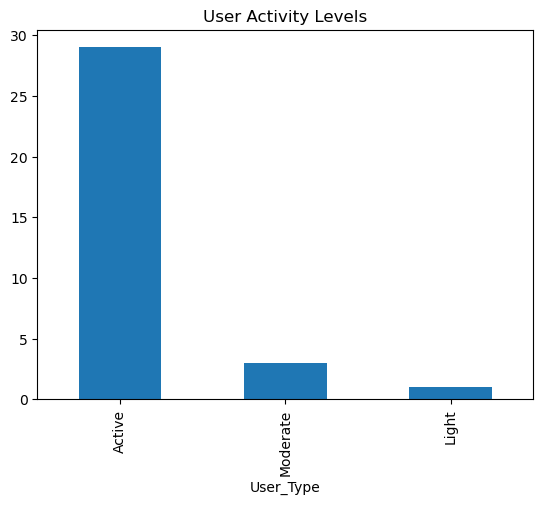

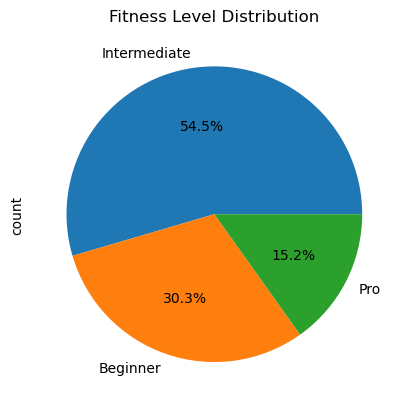

In [28]:
# 10. Use this filtered data to create charts and graphs for better visualization

#User Type distribution
user_summary['User_Type'].value_counts().plot(kind='bar', title='User Activity Levels')
plt.show()

#Fitness level
user_summary['Fitness_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Fitness Level Distribution")
plt.show()

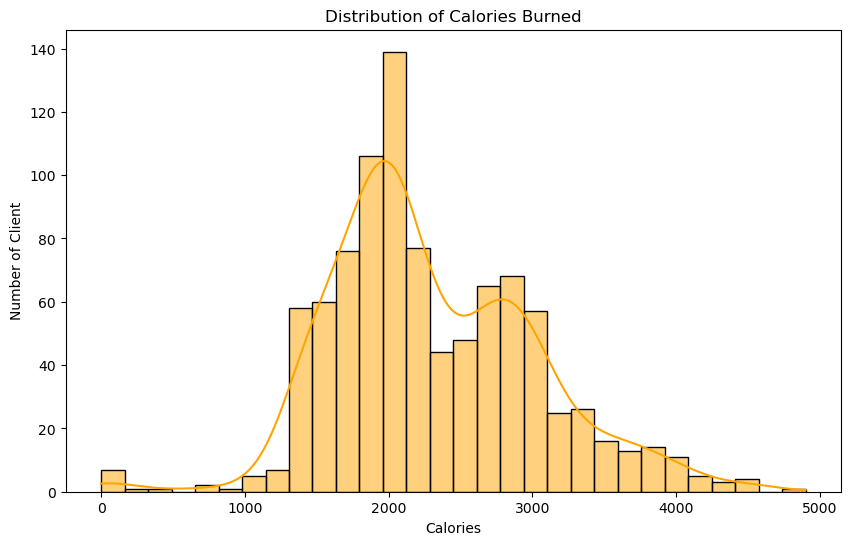

In [4]:
# Calories Burned Distribution

plt.figure(figsize=(10,6))
sns.histplot(daily_activity['Calories'], bins=30, kde=True, color='orange')
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories')
plt.ylabel('Number of Client')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


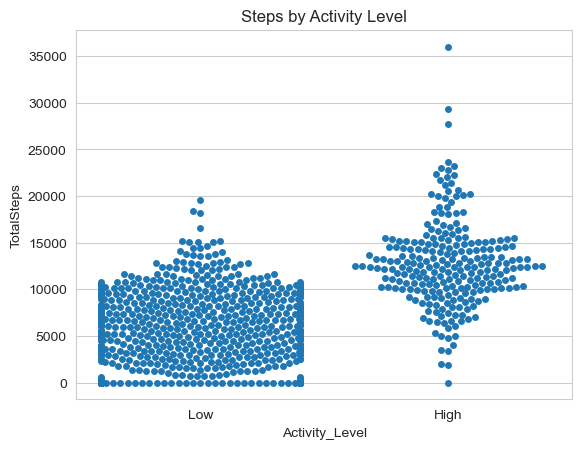

In [14]:
# How are TotalSteps distributed across different activity intensity levels?

daily_activity['Activity_Level'] = daily_activity['VeryActiveMinutes'].apply(
    lambda x: 'High' if x > 30 else 'Low'
)

sns.swarmplot(x='Activity_Level', y='TotalSteps', data=daily_activity)
plt.title("Steps by Activity Level")
plt.show()

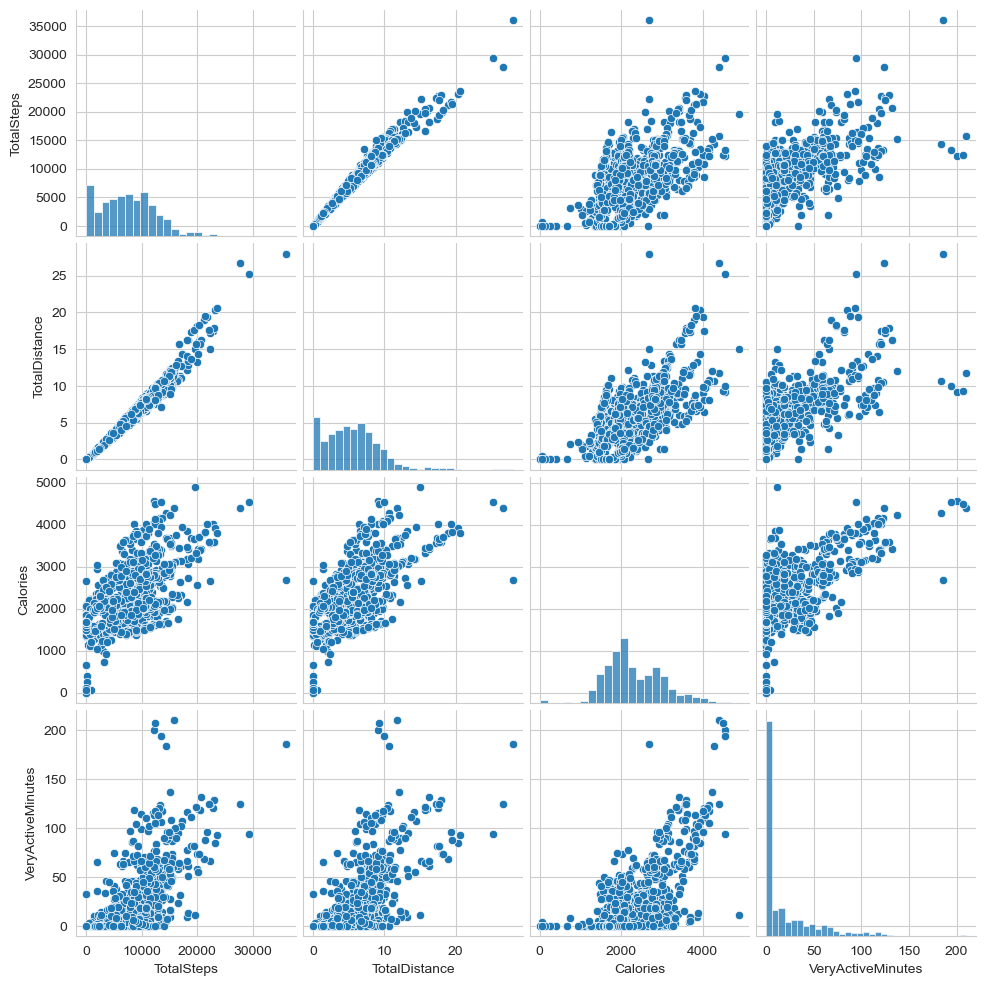

In [17]:
# Analyze relationships between steps, distance, calories, and activity minutes.

sns.pairplot(
    daily_activity[['TotalSteps','TotalDistance','Calories','VeryActiveMinutes']]
)
plt.gridline(False)
plt.show()

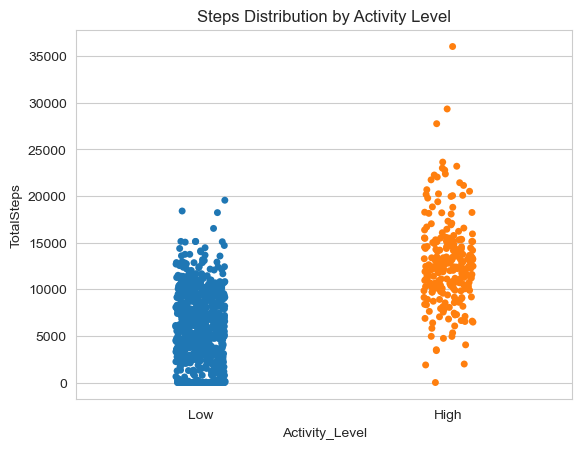

In [22]:
sns.stripplot(x='Activity_Level', y='TotalSteps', hue='Activity_Level',data=daily_activity, jitter=True)
plt.title("Steps Distribution by Activity Level")
plt.show()

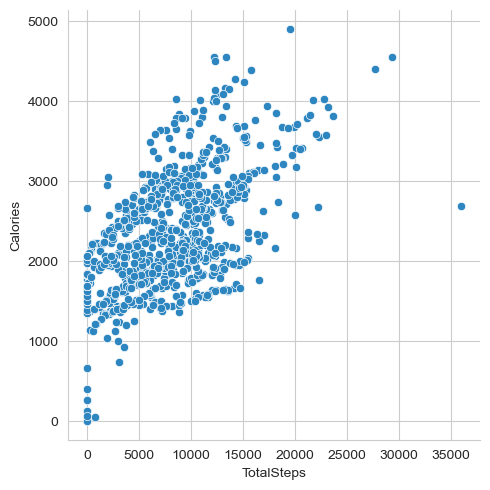

In [23]:
# MULTIVARIATE
sns.relplot(
    x='TotalSteps',
    y='Calories',
    data=daily_activity,
    color=main_color
)
plt.show()

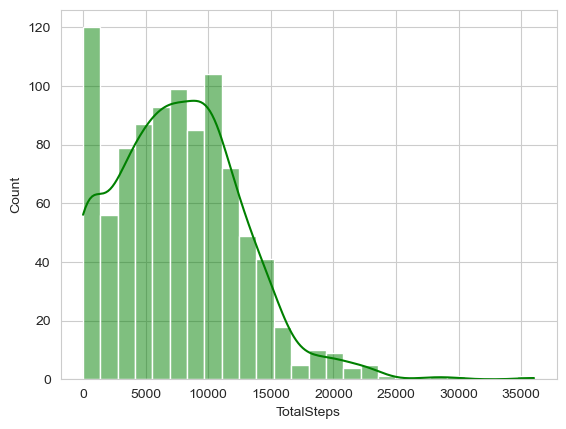

In [26]:
sns.histplot(
    daily_activity['TotalSteps'],
    kde=True,color='green'
)
plt.show()

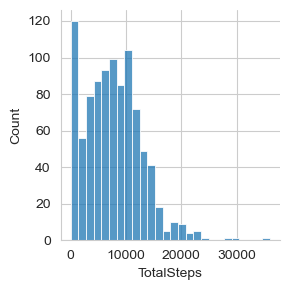

In [29]:
g = sns.FacetGrid(daily_activity)
g.map(sns.histplot, 'TotalSteps')
plt.show()

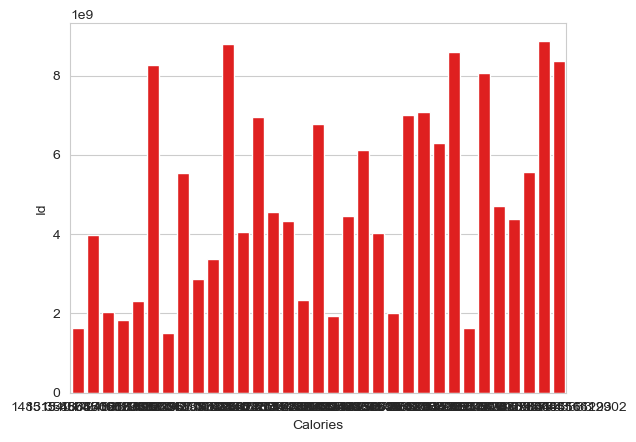

In [31]:
avg_cal = daily_activity.groupby('Id')['Calories'].mean().reset_index()

sns.barplot(
    y='Id',
    x='Calories',
    data=avg_cal,
    color='red'
)
plt.show()

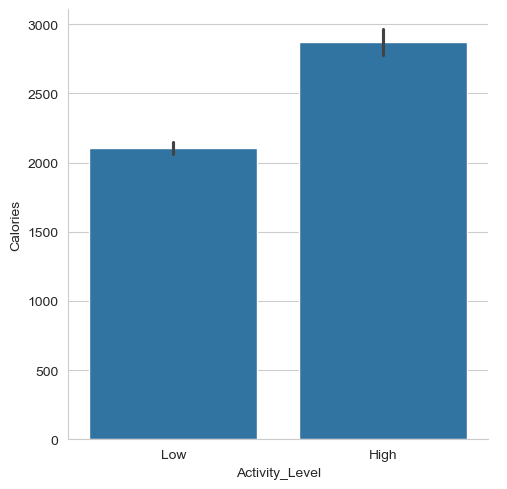

In [39]:
sns.catplot(
    x='Activity_Level',
    y='Calories',
    kind='bar',
    data=daily_activity
)
plt.show()

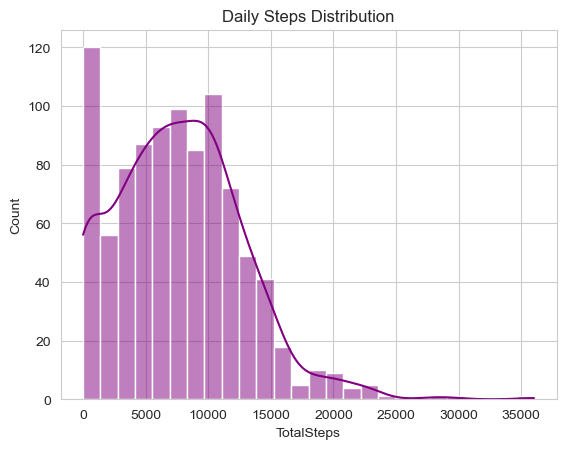

In [40]:
sns.histplot(
    daily_activity['TotalSteps'],
    kde=True,
    color='purple'
)
plt.title("Daily Steps Distribution")
plt.show()

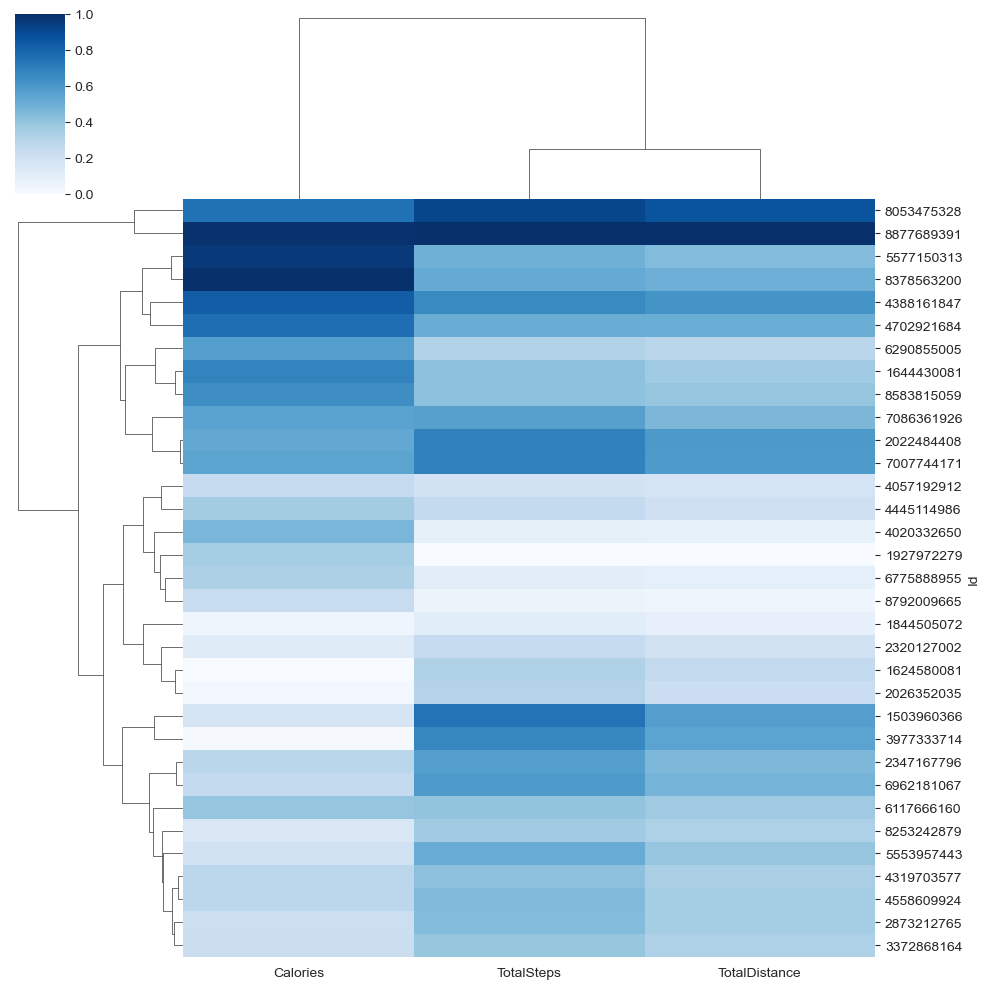

In [24]:
# CLUSTERMAP 

pivot_activity = daily_activity.groupby('Id')[[
    'TotalSteps','Calories','TotalDistance'
]].mean()

sns.clustermap(
    pivot_activity,
    cmap="Blues",
    standard_scale=1
)
plt.show()

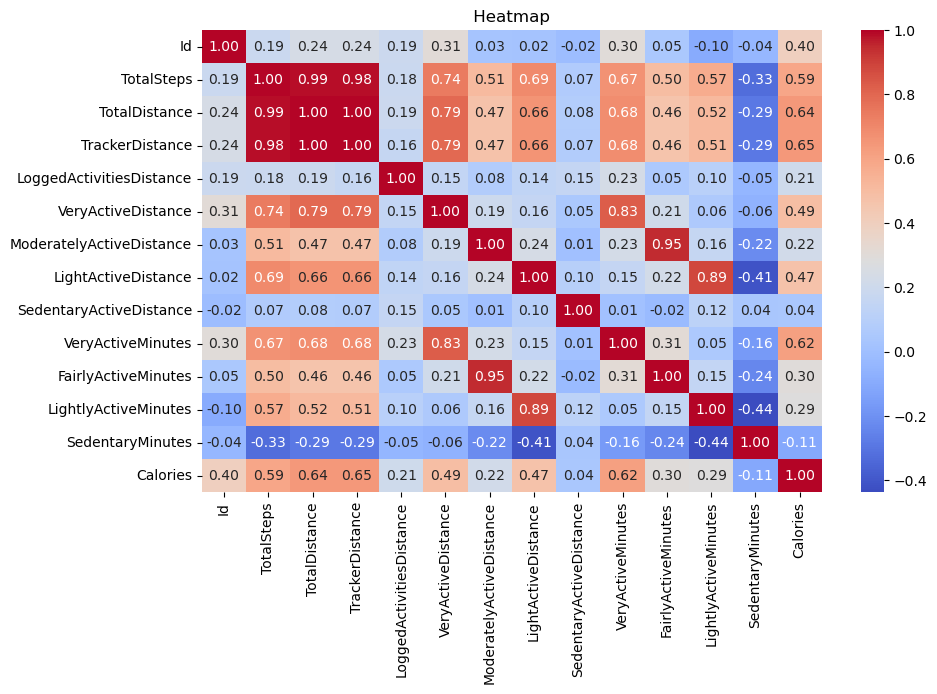

In [9]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(daily_activity.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(' Heatmap ')
plt.show()

In [3]:
#Load the Fitbit dataset using pandas
heart_rate= pd.read_csv("heartrate_seconds_merged.csv")

heart_rate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [26]:
#Load the Fitbit dataset using pandas

sleepDay = pd.read_csv("sleepDay_merged.csv")

sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [27]:
#Load the Fitbit dataset using pandas

weight_info = pd.read_csv("weightLogInfo_merged.csv")

weight_info.head()


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [11]:
df = pd.merge(daily_activity,heart_rate,on ='Id',how = 'inner') 
df 

MemoryError: Unable to allocate 559. MiB for an array with shape (73205765,) and data type int64

In [28]:
df1 = pd.merge(weight_info,sleepDay,on = 'Id',how = 'inner')
df1

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...,...,...,...,...,...,...,...
1083,6962181067,5/12/2016 11:59:59 PM,61.900002,136.466144,NaN,24.17,True,1463097599000,5/8/2016 12:00:00 AM,1,541,569
1084,6962181067,5/12/2016 11:59:59 PM,61.900002,136.466144,NaN,24.17,True,1463097599000,5/9/2016 12:00:00 AM,1,489,497
1085,6962181067,5/12/2016 11:59:59 PM,61.900002,136.466144,NaN,24.17,True,1463097599000,5/10/2016 12:00:00 AM,1,469,481
1086,6962181067,5/12/2016 11:59:59 PM,61.900002,136.466144,NaN,24.17,True,1463097599000,5/11/2016 12:00:00 AM,1,452,480


In [ ]:
# df2 (Weight + SleepDay)

In [14]:
# 1.How many users have recorded both weight and sleep data?

df1.shape

(1088, 12)

In [16]:
# 2.What is the average sleep duration?

df1['TotalMinutesAsleep'].mean()/60

np.float64(7.290854779411764)

In [17]:
# 3.What is the average BMI of users?

df1['BMI'].mean()

np.float64(24.4027295498287)

In [18]:
# 4. Analyze how sleep duration varies with BMI levels.

df1[['TotalMinutesAsleep','BMI']].corr()

,TotalMinutesAsleep,BMI
TotalMinutesAsleep,1.000000,-0.086427
BMI,-0.086427,1.000000


In [19]:
# 5.Identify users with poor sleep and high BMI.

df1[(df1['TotalMinutesAsleep'] < 360) & (df1['BMI'] > 30)]

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
53,1927972279,4/13/2016 1:08:52 AM,133.5,294.31712,NaN,47.540001,False,1460509732000,4/26/2016 12:00:00 AM,1,296,315
54,1927972279,4/13/2016 1:08:52 AM,133.5,294.31712,NaN,47.540001,False,1460509732000,4/28/2016 12:00:00 AM,1,166,178


In [20]:
# 6.Determine whether longer sleep is associated with healthier BMI.

df1.groupby(pd.cut(df1['TotalMinutesAsleep'],3))['BMI'].mean()

C:\Users\asus\AppData\Local\Temp\ipykernel_9632\3609068836.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby(pd.cut(df1['TotalMinutesAsleep'],3))['BMI'].mean()


TotalMinutesAsleep
(58.309, 289.333]     26.450000
(289.333, 519.667]    24.255673
(519.667, 750.0]      24.821552
Name: BMI, dtype: float64

In [22]:
# 7.Calculate average sleep hours per user.

df1.groupby('Id')['TotalMinutesAsleep'].mean()



Id
1503960366    360.280000
1927972279    417.000000
4319703577    476.653846
4558609924    127.600000
5577150313    432.000000
6962181067    448.000000
Name: TotalMinutesAsleep, dtype: float64

In [23]:
df1.groupby('Id')['BMI'].mean()

Id
1503960366    22.650000
1927972279    47.540001
4319703577    27.415000
4558609924    27.214000
5577150313    28.000000
6962181067    24.028000
Name: BMI, dtype: float64

In [29]:
# 8.Calculate average BMI per user.

def bmi_class(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df1['BMI_Class'] = df1['BMI'].apply(bmi_class)


In [32]:
bmi_class(35)

'Obese'

In [ ]:
# 9.Write a function to classify BMI (Underweight, Normal, Overweight, Obese).

def bmi_class(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df2['BMI_Class'] = df2['BMI'].apply(bmi_class)

In [35]:
bmi_class(22)

'Normal'

In [36]:
# 10.Create a function to classify sleep quality (Poor, Fair, Good).

def sleep_quality(mins):
    if mins < 360:
        return 'Poor'
    elif mins < 480:
        return 'Fair'
    else:
        return 'Good'

df1['Sleep_Quality'] = df1['TotalMinutesAsleep'].apply(sleep_quality)

In [37]:
 sleep_quality(450)

'Fair'

In [40]:
# 11.Flag users with sleep below 6 hours as “Sleep Deprived”.

df1['Sleep_Deprived'] = df1['TotalMinutesAsleep'].apply(lambda x: 1 if x < 360 else 0)

df1

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,BMI_Class,Sleep_Quality,Sleep_Deprived
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000,4/12/2016 12:00:00 AM,1,327,346,Normal,Poor,1
1,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000,4/13/2016 12:00:00 AM,2,384,407,Normal,Fair,0
2,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000,4/15/2016 12:00:00 AM,1,412,442,Normal,Fair,0
3,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000,4/16/2016 12:00:00 AM,2,340,367,Normal,Poor,1
4,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000,4/17/2016 12:00:00 AM,1,700,712,Normal,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,6962181067,5/12/2016 11:59:59 PM,61.900002,136.466144,NaN,24.17,True,1463097599000,5/8/2016 12:00:00 AM,1,541,569,Normal,Good,0
1084,6962181067,5/12/2016 11:59:59 PM,61.900002,136.466144,NaN,24.17,True,1463097599000,5/9/2016 12:00:00 AM,1,489,497,Normal,Good,0
1085,6962181067,5/12/2016 11:59:59 PM,61.900002,136.466144,NaN,24.17,True,1463097599000,5/10/2016 12:00:00 AM,1,469,481,Normal,Fair,0
1086,6962181067,5/12/2016 11:59:59 PM,61.900002,136.466144,NaN,24.17,True,1463097599000,5/11/2016 12:00:00 AM,1,452,480,Normal,Fair,0


In [42]:
# 12.Categorize BMI using lambda logic.

df1['High_BMI'] = df1['BMI'].apply(lambda x: 1 if x > 30 else 0)
df1

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,BMI_Class,Sleep_Quality,Sleep_Deprived,High_BMI
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000,4/12/2016 12:00:00 AM,1,327,346,Normal,Poor,1,0
1,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000,4/13/2016 12:00:00 AM,2,384,407,Normal,Fair,0,0
2,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000,4/15/2016 12:00:00 AM,1,412,442,Normal,Fair,0,0
3,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000,4/16/2016 12:00:00 AM,2,340,367,Normal,Poor,1,0
4,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000,4/17/2016 12:00:00 AM,1,700,712,Normal,Good,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,6962181067,5/12/2016 11:59:59 PM,61.900002,136.466144,NaN,24.17,True,1463097599000,5/8/2016 12:00:00 AM,1,541,569,Normal,Good,0,0
1084,6962181067,5/12/2016 11:59:59 PM,61.900002,136.466144,NaN,24.17,True,1463097599000,5/9/2016 12:00:00 AM,1,489,497,Normal,Good,0,0
1085,6962181067,5/12/2016 11:59:59 PM,61.900002,136.466144,NaN,24.17,True,1463097599000,5/10/2016 12:00:00 AM,1,469,481,Normal,Fair,0,0
1086,6962181067,5/12/2016 11:59:59 PM,61.900002,136.466144,NaN,24.17,True,1463097599000,5/11/2016 12:00:00 AM,1,452,480,Normal,Fair,0,0


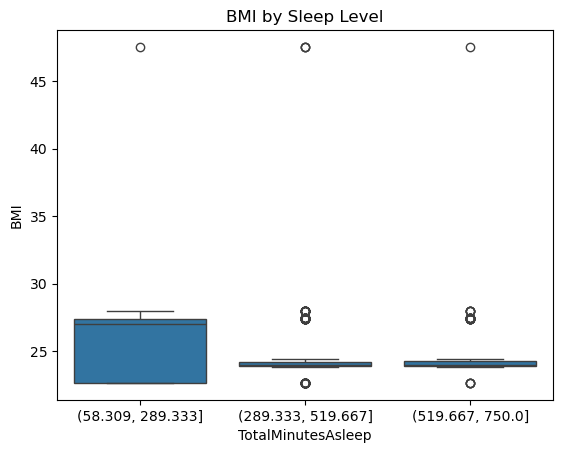

In [36]:
# 13.BMI spread by sleep amount
sns.boxplot(x=pd.cut(df1['TotalMinutesAsleep'],3), y='BMI', data=df1)
plt.title("BMI by Sleep Level")
plt.show()

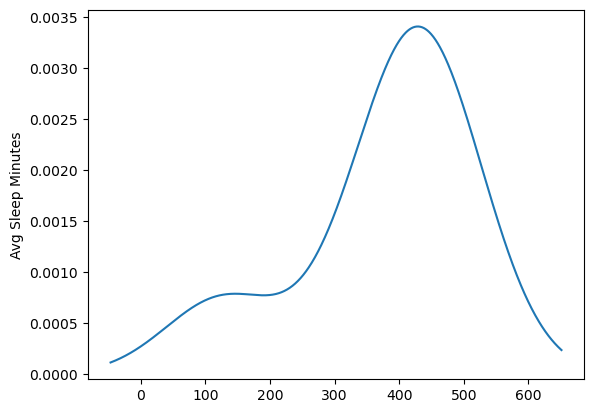

In [42]:
# 14.Average sleep per user
df1.groupby('Id')['TotalMinutesAsleep'].mean().plot(kind='kde')
plt.ylabel("Avg Sleep Minutes")
plt.show()

In [ ]:
# Seaborn Visualization ---

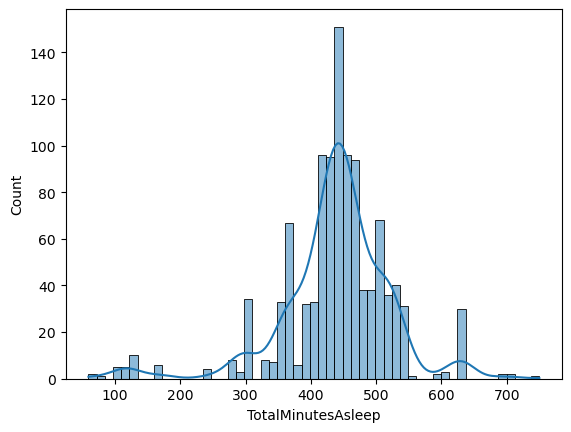

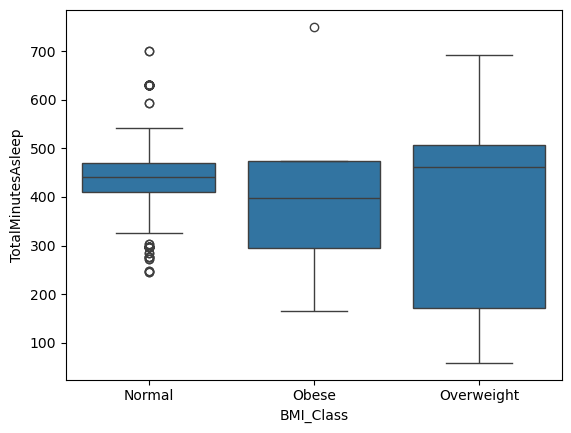

In [45]:
# 15. Create a histogram of heart rate distribution

sns.histplot(df1['TotalMinutesAsleep'], kde=True)
plt.show()

sns.boxplot(x='BMI_Class', y='TotalMinutesAsleep', data=df1)
plt.show()


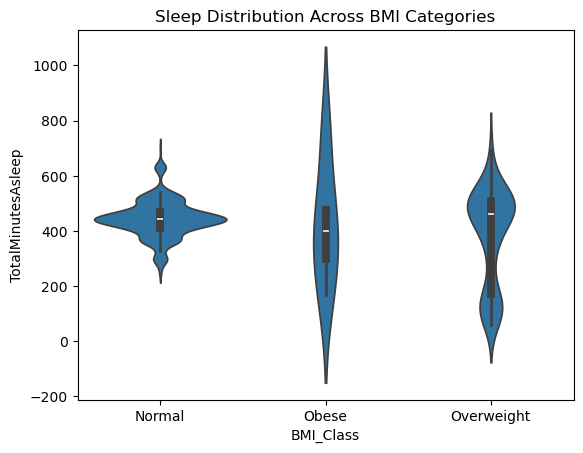

In [50]:
# Create a violin plot showing the distribution of sleep duration across BMI categories.

sns.violinplot(x='BMI_Class', y='TotalMinutesAsleep', data=df1)
plt.title("Sleep Distribution Across BMI Categories")
plt.show()

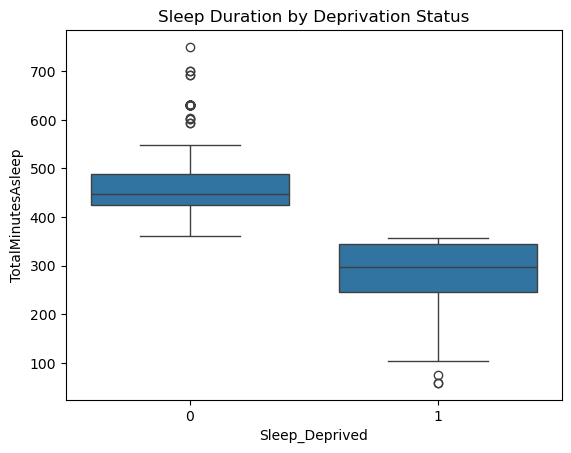

In [54]:
# Plot sleep duration distribution split by Sleep_Deprived status.

sns.boxplot(x='Sleep_Deprived', y='TotalMinutesAsleep', data=df1)
plt.title("Sleep Duration by Deprivation Status")
plt.show()


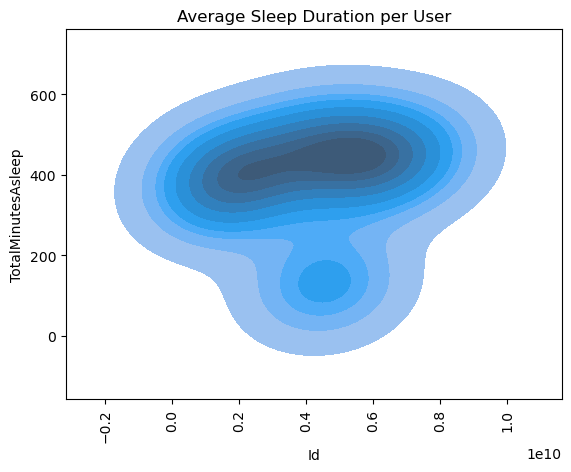

In [61]:
# Create a bar chart of average sleep hours per user (groupby Id).

sleep_user = df1.groupby('Id')['TotalMinutesAsleep'].mean().reset_index()

sns.kdeplot(x='Id', y='TotalMinutesAsleep', fill='True',data=sleep_user)
plt.xticks(rotation=90)
plt.title("Average Sleep Duration per User")
plt.show()

<Figure size 1000x2000 with 0 Axes>

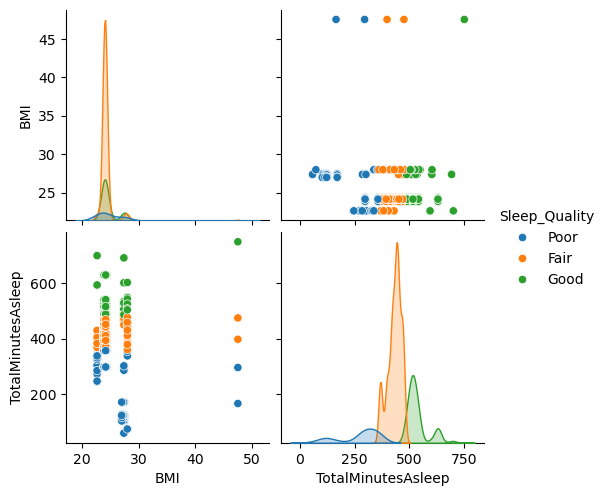

In [69]:
# Create a pairplot using:    BMI , TotalMinutesAsleep ,  Sleep_Quality (as hue)  to analyze overall health patterns.

plt.figure(figsize=(10,20))

sns.pairplot(df1[['BMI','TotalMinutesAsleep','Sleep_Quality']], hue='Sleep_Quality')
plt.show()


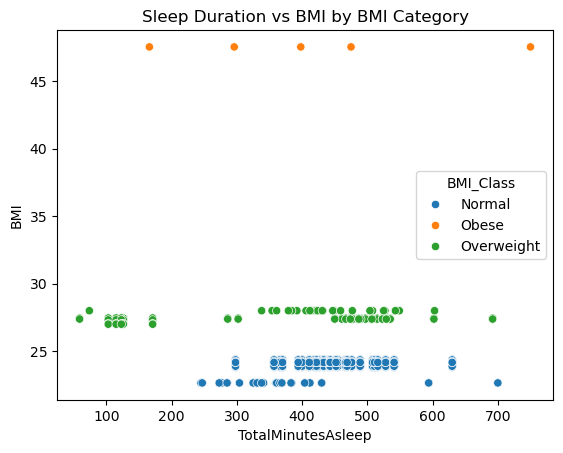

In [71]:
# Create a scatter plot between TotalMinutesAsleep and BMI colored by BMI_Class.

sns.scatterplot(x='TotalMinutesAsleep', y='BMI', hue='BMI_Class', data=df1)
plt.title("Sleep Duration vs BMI by BMI Category")
plt.show()

------------------------ HEART RATE DATASET — EDA QUESTIONS --------------------------


In [5]:
# 1.How many records and users are present in the heart rate dataset?

heart_rate.shape
heart_rate['Id'].nunique()

14

In [6]:
# 2.What is the minimum, maximum, and average heart rate value recorded?


print(heart_rate['Value'].max())
print(heart_rate['Value'].mean())

203
77.32842363964765


In [7]:
heart_rate['Value'].min()

36

In [8]:
# 3.Are there any missing or abnormal heart rate values in the dataset?

heart_rate.isnull().sum()

Id       0
Time     0
Value    0
dtype: int64

In [9]:
# Abnormal values (too low or too high)
heart_rate[(heart_rate['Value'] < 40) | (heart_rate['Value'] > 180)]

,Id,Time,Value
16678,2022484408,4/15/2016 9:36:35 AM,184
16679,2022484408,4/15/2016 9:36:45 AM,189
16680,2022484408,4/15/2016 9:36:50 AM,188
16681,2022484408,4/15/2016 9:36:55 AM,185
16682,2022484408,4/15/2016 9:37:05 AM,183
...,...,...,...
1978988,6962181067,5/10/2016 7:50:34 AM,183
1978989,6962181067,5/10/2016 7:50:35 AM,184
1978990,6962181067,5/10/2016 7:50:37 AM,183
1978991,6962181067,5/10/2016 7:50:38 AM,182


In [10]:
# 4.Calculate the average heart rate for each user.

avg_hr_user = heart_rate.groupby('Id')['Value'].mean().reset_index()
avg_hr_user

,Id,Value
0,2022484408,80.236860
1,2026352035,93.776305
2,2347167796,76.722792
3,4020332650,82.300577
4,4388161847,66.132998
5,4558609924,81.673947
6,5553957443,68.633093
7,5577150313,69.564516
8,6117666160,83.749891
9,6775888955,92.029630


In [11]:
# 5.Calculate the maximum heart rate recorded per user.

avg_hr_user = heart_rate.groupby('Id')['Value'].max().reset_index()
avg_hr_user

,Id,Value
0,2022484408,203
1,2026352035,125
2,2347167796,195
3,4020332650,191
4,4388161847,180
5,4558609924,199
6,5553957443,165
7,5577150313,174
8,6117666160,189
9,6775888955,177


In [12]:
# 6.Write a function to classify heart rate as:

# Low

# Normal

# High

# based on heart rate value.


def hr_category(hr):
    if hr < 60:
        return 'Low'
    elif hr <= 100:
        return 'Normal'
    else:
        return 'High'

heart_rate['HR_Level'] = heart_rate['Value'].apply(hr_category)
heart_rate.head()


,Id,Time,Value,HR_Level
0,2022484408,4/12/2016 7:21:00 AM,97,Normal
1,2022484408,4/12/2016 7:21:05 AM,102,High
2,2022484408,4/12/2016 7:21:10 AM,105,High
3,2022484408,4/12/2016 7:21:20 AM,103,High
4,2022484408,4/12/2016 7:21:25 AM,101,High


In [13]:
# 7.Create a function to identify risk level:

# High Risk if heart rate > 100
# Else Normal Risk


def risk_level(hr):
    if hr > 100:
        return 'High Risk'
    else:
        return 'Normal'

heart_rate['Risk_Level'] = heart_rate['Value'].apply(risk_level)
heart_rate.head()

,Id,Time,Value,HR_Level,Risk_Level
0,2022484408,4/12/2016 7:21:00 AM,97,Normal,Normal
1,2022484408,4/12/2016 7:21:05 AM,102,High,High Risk
2,2022484408,4/12/2016 7:21:10 AM,105,High,High Risk
3,2022484408,4/12/2016 7:21:20 AM,103,High,High Risk
4,2022484408,4/12/2016 7:21:25 AM,101,High,High Risk


In [14]:
# 8.Create a new column that labels heart rate values as:

# • "High HR" if heart rate is greater than 100
# • "Normal HR" otherwise

heart_rate['HR_Label'] = heart_rate['Value'].apply(
    lambda x: 'High HR' if x > 100 else 'Normal HR'
)

heart_rate[['Value','HR_Label']].head()  

,Value,HR_Label
0,97,Normal HR
1,102,High HR
2,105,High HR
3,103,High HR
4,101,High HR


In [15]:
# 9.Create a binary flag column:

# • 1 if heart rate is above the dataset’s average heart rate
# • 0 if it is equal to or below the average

# First find average heart rate
avg_hr = heart_rate['Value'].mean()
avg_hr

# Create binary column using lambda
heart_rate['Above_Average_HR'] = heart_rate['Value'].apply(
    lambda x: 1 if x > avg_hr else 0
)

heart_rate[['Value','Above_Average_HR']].head()

,Value,Above_Average_HR
0,97,1
1,102,1
2,105,1
3,103,1
4,101,1


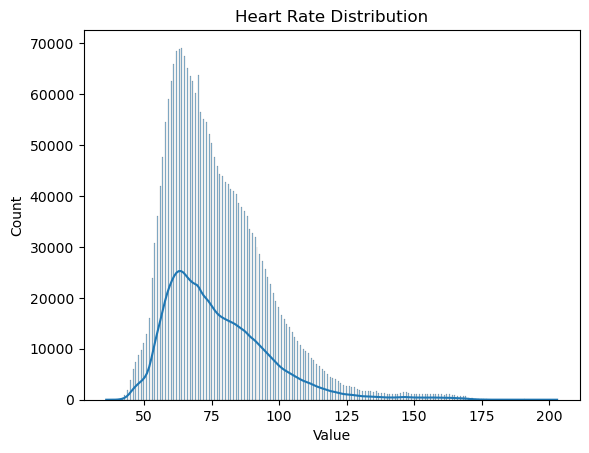

In [15]:
#  SEABORN VISUALIZATION QUESTIONS 
# 10.Create a histogram with KDE to visualize heart rate distribution.


sns.histplot(heart_rate['Value'], kde=True)
plt.title("Heart Rate Distribution")
plt.show()

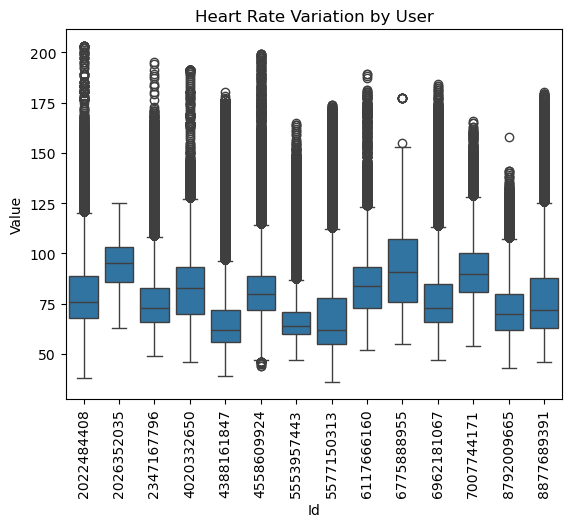

In [14]:
# 11.Create a boxplot showing heart rate variation for different users.

sns.boxplot(x='Id', y='Value', data=heart_rate)
plt.xticks(rotation=90)
plt.title("Heart Rate Variation by User")
plt.show()

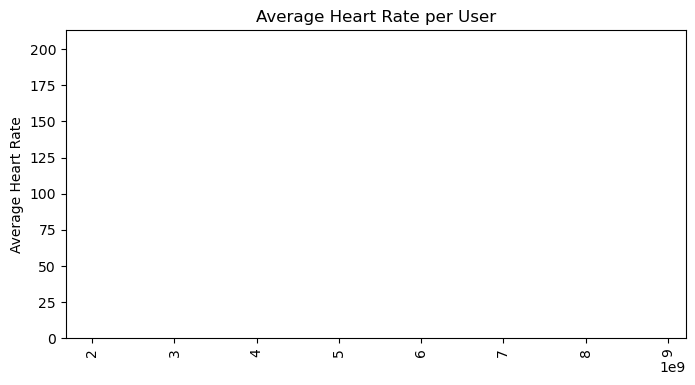

In [21]:
# MATPLOTLIB VISUALIZATION QUESTIONS ----

# 12.Plot average heart rate per user using a bar chart.

plt.figure(figsize=(8,4))
plt.bar(avg_hr_user['Id'], avg_hr_user['Value'])
plt.xticks(rotation=90)
plt.ylabel("Average Heart Rate")
plt.title("Average Heart Rate per User")
plt.show()

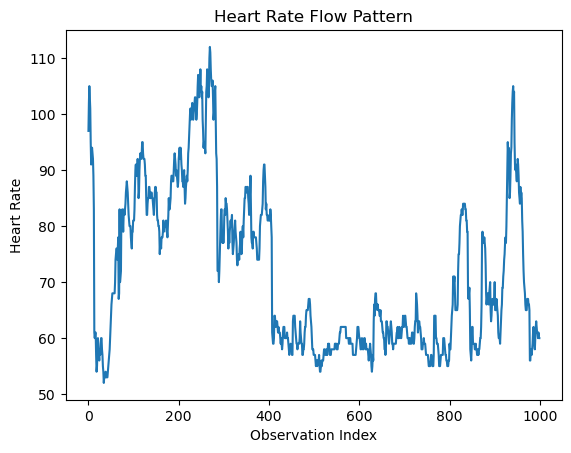

In [21]:
plt.plot(heart_rate['Value'].values[:1000])
plt.xlabel("Observation Index")
plt.ylabel("Heart Rate")
plt.title("Heart Rate Flow Pattern")
plt.show()

In [ ]:
# ------------- MULTIVARIATE (COMBINED VIEW)  -----------------------------

C:\Users\asus\AppData\Local\Temp\ipykernel_9060\4019580704.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


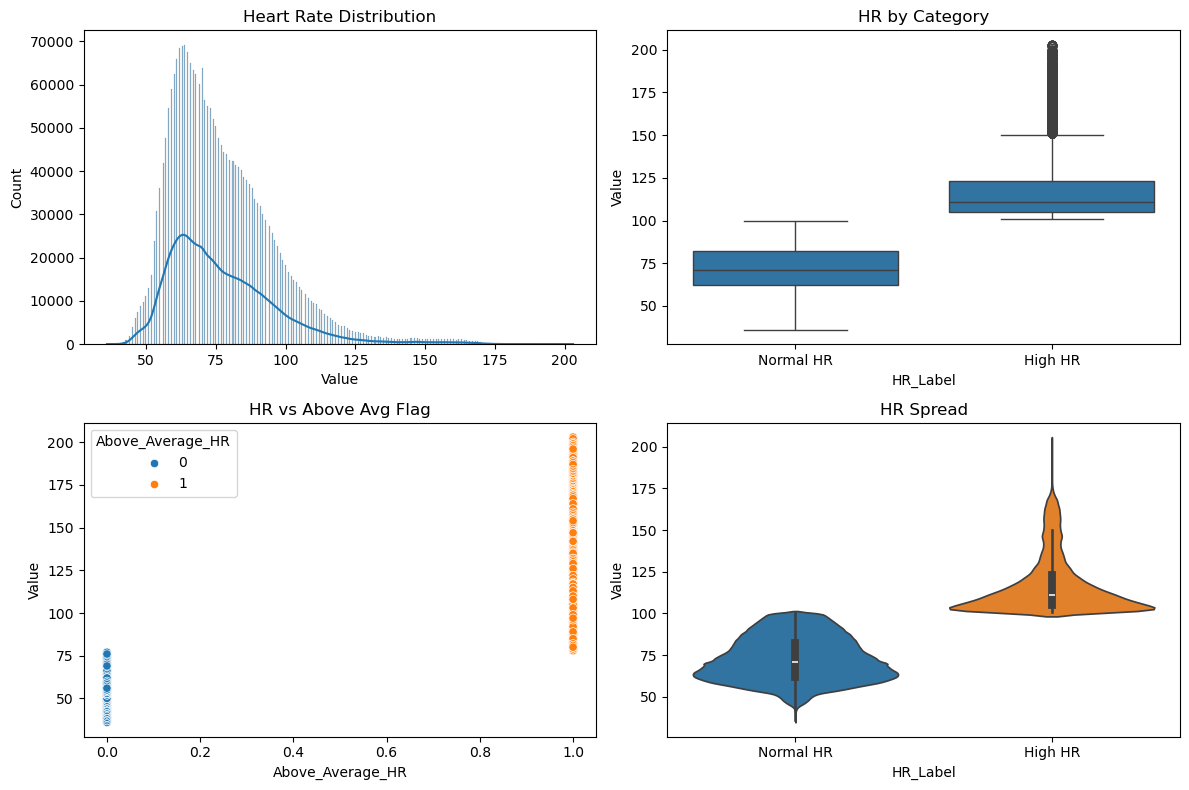

In [16]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.histplot(heart_rate['Value'],kde=True)
plt.title("Heart Rate Distribution")

plt.subplot(2,2,2)
sns.boxplot(x='HR_Label', y='Value', data=heart_rate)
plt.title("HR by Category")

plt.subplot(2,2,3)
sns.scatterplot(x='Above_Average_HR', y='Value', hue='Above_Average_HR',data=heart_rate)
plt.title("HR vs Above Avg Flag")

plt.subplot(2,2,4)
sns.violinplot(x='HR_Label', y='Value', data=heart_rate,hue='HR_Label')
plt.title("HR Spread")

plt.tight_layout()
plt.show()